### GroupBy Example

In [1]:
#import packages
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a data frame as below
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo','bar','foo', 'bar', 'foo','foo'],
                          
                   'B' : ['one', 'one', 'two','three','two', 'two', 'one','three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [3]:
#Grouped according to A
grouped=df.groupby('A')
grouped.head()

,A,B,C,D
0,foo,one,-0.016544,0.237477
1,bar,one,-0.650710,-0.601207
2,foo,two,1.373240,0.555659
3,bar,three,-0.777707,0.537450
4,foo,two,-0.111194,-0.002818
5,bar,two,-0.237149,0.178711
6,foo,one,0.159523,-0.333041
7,foo,three,1.140117,0.889149


In [4]:
#Grouped according to A and then get sum of group
grouped=df.groupby('A').sum()
grouped.head()

,C,D
A,,
bar,-1.665567,0.114955
foo,2.545142,1.346427


In [5]:
#Grouped according to A and B both column
grouped=df.groupby(['A','B'])
grouped.head()

,A,B,C,D
0,foo,one,-0.016544,0.237477
1,bar,one,-0.650710,-0.601207
2,foo,two,1.373240,0.555659
3,bar,three,-0.777707,0.537450
4,foo,two,-0.111194,-0.002818
5,bar,two,-0.237149,0.178711
6,foo,one,0.159523,-0.333041
7,foo,three,1.140117,0.889149


In [6]:
#Getting the sum of GroupedBy according to A and B both column
grouped=df.groupby(['A','B']).sum()
grouped.head()

C         D
A   B                        
bar one   -0.650710 -0.601207
    three -0.777707  0.537450
    two   -0.237149  0.178711
foo one    0.142979 -0.095563
    three  1.140117  0.889149

In [7]:
#Method to get vowel type
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonent'
grouped=df.groupby(get_letter_type,axis=1)

In [8]:
#Define list as below
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
grouped=s.groupby(level=0)
grouped.head()

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [9]:
#Getting first column
grouped.first()

1    1
2    2
3    3
dtype: int64

In [10]:
#getting last column
grouped.last()

1    10
2    20
3    30
dtype: int64

In [11]:
#Getting sum value
grouped.sum()

1    11
2    22
3    33
dtype: int64

In [12]:
#Consider another data frame
df2=pd.DataFrame({'X': ['B','B','A','A'],'Y':[1,2,3,4]})
#Getting groupby with sum
grouped=df2.groupby('X').sum()
grouped.head()

,Y
X,
A,7
B,3


In [13]:
#Getting result in unsorted order
grouped=df2.groupby('X',sort=False).sum()
grouped.head()

,Y
X,
B,3
A,7


In [14]:
#Define another data frame 
df3=pd.DataFrame({'X':['A','B','A','B'],'Y':[1,4,3,2]})
grouped=df3.groupby('X').get_group('A')
grouped.head()

,X,Y
0,A,1
2,A,3


In [15]:
#Getting group of B value
grouped=df3.groupby('X').get_group('B')
grouped

,X,Y
1,B,4
3,B,2


In [16]:
#Groupby Object attribute
df.groupby('A').groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [17]:
#Getting groupby labels belonging to each group
df.groupby(get_letter_type,axis=1).groups

{'consonent': Index(['B', 'C', 'D'], dtype='object'),
 'vowel': Index(['A'], dtype='object')}

In [18]:
#Groupby operations with A and B
grouped=df.groupby(['A','B'])
grouped.groups

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

In [19]:
len(grouped)

6

In [20]:
#Making Another dataframe
df=pd.DataFrame({'Date' : ['2000-01-01','2000-01-02','2000-01-03','2000-01-04','2000-01-05','2000-01-06','2000-01-07','2000-01-08','2000-01-09','2000-01-10'],
                 'gender' : ['male','male','male','female','male','female','male','female','female','male'],
                 'height' : ['42.849980','49.607315','56.293531','48.421077','46.556882','68.448851','70.757698','58.909500','76.435631','45.306120'],
                 'weight' : ['157.500553','177.340407','171.524640','144.251986','152.526206','168.272968','136.431469','176.499753','174.094104','177.540920']})


In [21]:
#Change the column Date into datetime
df['Date']=df['Date'].astype('datetime64[ns]')
df.dtypes

Date      datetime64[ns]
gender            object
height            object
weight            object
dtype: object

In [22]:
#Change the column height and weight into integer
df[['height','weight']]=df[['height','weight']].astype('float64')
df.dtypes

Date      datetime64[ns]
gender            object
height           float64
weight           float64
dtype: object

In [23]:
#Taking groupby 
gb=df.groupby('gender')
gb.head()

,Date,gender,height,weight
0,2000-01-01,male,42.849980,157.500553
1,2000-01-02,male,49.607315,177.340407
2,2000-01-03,male,56.293531,171.524640
3,2000-01-04,female,48.421077,144.251986
4,2000-01-05,male,46.556882,152.526206
5,2000-01-06,female,68.448851,168.272968
6,2000-01-07,male,70.757698,136.431469
7,2000-01-08,female,58.909500,176.499753
8,2000-01-09,female,76.435631,174.094104


In [24]:
#GroupBy with multiindex
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [25]:
#Define random value 
s = pd.Series(np.random.randn(8),index=index)
s

first  second
bar    one      -1.267153
       two      -0.138858
baz    one       2.084768
       two      -0.752045
foo    one       0.383220
       two      -1.387185
qux    one      -0.175255
       two      -0.604561
dtype: float64

In [26]:
#Taking groupby method in level
grouped=s.groupby(level=0)
grouped.head()

first  second
bar    one      -1.267153
       two      -0.138858
baz    one       2.084768
       two      -0.752045
foo    one       0.383220
       two      -1.387185
qux    one      -0.175255
       two      -0.604561
dtype: float64

In [27]:
#Taking sum
grouped.sum()

first
bar   -1.406011
baz    1.332723
foo   -1.003965
qux   -0.779817
dtype: float64

In [28]:
#Taking groupby of secondlevel
s.groupby(level='second').sum()

second
one    1.025579
two   -2.882648
dtype: float64

In [29]:
s.sum(level='second')

second
one    1.025579
two   -2.882648
dtype: float64

In [30]:
s

first  second
bar    one      -1.267153
       two      -0.138858
baz    one       2.084768
       two      -0.752045
foo    one       0.383220
       two      -1.387185
qux    one      -0.175255
       two      -0.604561
dtype: float64

In [31]:
#Taking groupby level first and second both
s.groupby(level=['first','second']).sum()

first  second
bar    one      -1.267153
       two      -0.138858
baz    one       2.084768
       two      -0.752045
foo    one       0.383220
       two      -1.387185
qux    one      -0.175255
       two      -0.604561
dtype: float64

In [32]:
#Index level names may be supplied as keys as 
s.groupby(['first','second']).sum()

first  second
bar    one      -1.267153
       two      -0.138858
baz    one       2.084768
       two      -0.752045
foo    one       0.383220
       two      -1.387185
qux    one      -0.175255
       two      -0.604561
dtype: float64

In [33]:
#Grouping DataFrame with Index Levels and Columns
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
            ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

#Define MultiIndexing 
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

In [34]:
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [35]:
#Define Another DataFrame
df=pd.DataFrame({'A':[1,1,1,1,2,2,3,3],
                 'B':np.arange(8)},
               index=index)
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [36]:
#Define groupby function
df.groupby([pd.Grouper(level=0)]).sum()

,A,B
first,,
bar,2,1
baz,2,5
foo,4,9
qux,6,13


In [37]:
#Define groupby function
df.groupby([pd.Grouper(level=1)]).sum()

,A,B
second,,
one,7,12
two,7,16


In [38]:
df.groupby([pd.Grouper(level='second'),'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [39]:
df.groupby(['second','A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [40]:
#DataFrame column selection in GroupBy
#grouped=df.groupby(['A'])
#grouped_C=grouped['C']
#grouped_D=grouped['D']
#df['C'].groupby(df['A'])

In [41]:
#Define a data frame as below
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo','bar','foo', 'bar', 'foo','foo'],
                          
                   'B' : ['one', 'one', 'two','three','two', 'two', 'one','three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [42]:
#Iterating through groups
grouped=df.groupby('A')
for group,name in grouped:
    print(group)
    print(name)

bar
     A      B         C         D
1  bar    one -0.446528 -0.820500
3  bar  three  0.043132 -0.218359
5  bar    two -0.306957 -0.419028
foo
     A      B         C         D
0  foo    one -0.274572  0.136989
2  foo    two  1.259160  1.980955
4  foo    two  1.135251  0.230160
6  foo    one  0.109309  1.309256
7  foo  three  0.333866  0.551402


In [43]:
for name,group in df.groupby(['A','B']):
    print(name)
    print(group)

('bar', 'one')
     A    B         C       D
1  bar  one -0.446528 -0.8205
('bar', 'three')
     A      B         C         D
3  bar  three  0.043132 -0.218359
('bar', 'two')
     A    B         C         D
5  bar  two -0.306957 -0.419028
('foo', 'one')
     A    B         C         D
0  foo  one -0.274572  0.136989
6  foo  one  0.109309  1.309256
('foo', 'three')
     A      B         C         D
7  foo  three  0.333866  0.551402
('foo', 'two')
     A    B         C         D
2  foo  two  1.259160  1.980955
4  foo  two  1.135251  0.230160


In [44]:
#df.groupby(['A','B']).get_group(('bar','one'))

In [45]:
#Aggregation
grouped = df.groupby('A')
grouped.aggregate(np.sum)

,C,D
A,,
bar,-0.710353,-1.457887
foo,2.563014,4.208761


In [46]:
grouped = df.groupby(['A', 'B'])
grouped.aggregate(np.sum)

C         D
A   B                        
bar one   -0.446528 -0.820500
    three  0.043132 -0.218359
    two   -0.306957 -0.419028
foo one   -0.165263  1.446244
    three  0.333866  0.551402
    two    2.394411  2.211115

In [47]:
grouped=df.groupby(['A','B'],as_index=False)
grouped.aggregate(np.sum)

,A,B,C,D
0,bar,one,-0.446528,-0.820500
1,bar,three,0.043132,-0.218359
2,bar,two,-0.306957,-0.419028
3,foo,one,-0.165263,1.446244
4,foo,three,0.333866,0.551402
5,foo,two,2.394411,2.211115


In [48]:
df.groupby(['A','B']).sum().reset_index()

,A,B,C,D
0,bar,one,-0.446528,-0.820500
1,bar,three,0.043132,-0.218359
2,bar,two,-0.306957,-0.419028
3,foo,one,-0.165263,1.446244
4,foo,three,0.333866,0.551402
5,foo,two,2.394411,2.211115


In [49]:
grouped.size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [50]:
grouped.describe()

C                                                                        \
  count      mean       std       min       25%       50%       75%       max   
0   1.0 -0.446528       NaN -0.446528 -0.446528 -0.446528 -0.446528 -0.446528   
1   1.0  0.043132       NaN  0.043132  0.043132  0.043132  0.043132  0.043132   
2   1.0 -0.306957       NaN -0.306957 -0.306957 -0.306957 -0.306957 -0.306957   
3   2.0 -0.082632  0.271445 -0.274572 -0.178602 -0.082632  0.013339  0.109309   
4   1.0  0.333866       NaN  0.333866  0.333866  0.333866  0.333866  0.333866   
5   2.0  1.197205  0.087617  1.135251  1.166228  1.197205  1.228183  1.259160   

      D                                                                        
  count      mean       std       min       25%       50%       75%       max  
0   1.0 -0.820500       NaN -0.820500 -0.820500 -0.820500 -0.820500 -0.820500  
1   1.0 -0.218359       NaN -0.218359 -0.218359 -0.218359 -0.218359 -0.218359  
2   1.0 -0.419028       NaN -0.419028 -0.419028 -0.419028 -0.419028 -0.419028  
3   2.0  0.723122  0.828918  0.136989  0.430055  0.723122  1.016189  1.309256  
4   1.0  0.551402       NaN  0.551402  0.551402  0.551402  0.551402  0.551402  
5   2.0  1.105558  1.237999  0.230160  0.667859  1.105558  1.543256  1.980955

In [51]:
#Applying multiple functions at once
grouped=df.groupby('A')
grouped['C'].agg([np.sum,np.mean,np.std])

,sum,mean,std
A,,,
bar,-0.710353,-0.236784,0.252259
foo,2.563014,0.512603,0.663188


In [52]:
df.groupby('A')[['C']].agg([np.sum,np.mean,np.std])

C                    
          sum      mean       std
A                                
bar -0.710353 -0.236784  0.252259
foo  2.563014  0.512603  0.663188

In [53]:
df.groupby('A')[['C','D']].agg([np.sum,np.mean,np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar -0.710353 -0.236784  0.252259 -1.457887 -0.485962  0.306600
foo  2.563014  0.512603  0.663188  4.208761  0.841752  0.786032

In [54]:
grouped.agg([np.sum,np.mean,np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar -0.710353 -0.236784  0.252259 -1.457887 -0.485962  0.306600
foo  2.563014  0.512603  0.663188  4.208761  0.841752  0.786032

In [55]:
grouped['C'].agg([np.sum,np.mean,np.std]).rename(columns={'sum':'foo',
                                                          'mean':'bar',
                                                          'std':'baz'    
                                                                })

,foo,bar,baz
A,,,
bar,-0.710353,-0.236784,0.252259
foo,2.563014,0.512603,0.663188


In [56]:
grouped.agg([np.sum,np.mean,np.std]).rename(columns={'sum':'foo',
                                                     'mean':'bar',
                                                     'std':'baz'    
                                                        })

C                             D                    
          foo       bar       baz       foo       bar       baz
A                                                              
bar -0.710353 -0.236784  0.252259 -1.457887 -0.485962  0.306600
foo  2.563014  0.512603  0.663188  4.208761  0.841752  0.786032

In [57]:
grouped.agg({'C' : np.sum,
             'D' : lambda x:np.std(x, ddof=1)})

,C,D
A,,
bar,-0.710353,0.306600
foo,2.563014,0.786032


In [58]:
grouped.agg({'C':'sum','D':'std'})

,C,D
A,,
bar,-0.710353,0.306600
foo,2.563014,0.786032


In [59]:
grouped.agg({'D':'std','C':'mean'})

,D,C
A,,
bar,0.306600,-0.236784
foo,0.786032,0.512603


In [60]:
from collections import OrderedDict
grouped.agg(OrderedDict([('D','std'),('C','mean')]))

,D,C
A,,
bar,0.306600,-0.236784
foo,0.786032,0.512603


In [61]:
#Cython-optimized aggregation functions
df.groupby('A').sum()

,C,D
A,,
bar,-0.710353,-1.457887
foo,2.563014,4.208761


In [62]:
#Groupby method
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one   -0.446528 -0.820500
    three  0.043132 -0.218359
    two   -0.306957 -0.419028
foo one   -0.082632  0.723122
    three  0.333866  0.551402
    two    1.197205  1.105558

In [63]:
#Transformation
index=pd.date_range('10/1/1999',periods=1100)
ts=pd.Series(np.random.normal(0.5, 2, 1100), index)

In [64]:
ts = ts.rolling(window=100,min_periods=100).mean().dropna()

In [65]:
ts.head()

2000-01-08    0.403338
2000-01-09    0.374249
2000-01-10    0.359659
2000-01-11    0.333315
2000-01-12    0.296255
Freq: D, dtype: float64

In [66]:
ts.tail()

2002-09-30    0.415507
2002-10-01    0.394825
2002-10-02    0.390021
2002-10-03    0.403910
2002-10-04    0.398668
Freq: D, dtype: float64

In [67]:
key = lambda x: x.year
zscore=lambda x:(x-x.mean())/x.std()
transformed=ts.groupby(key).transform(zscore)

In [68]:
transformed

2000-01-08    0.315482
2000-01-09    0.047101
2000-01-10   -0.087517
2000-01-11   -0.330570
2000-01-12   -0.672493
2000-01-13   -0.700930
2000-01-14   -0.759840
2000-01-15   -0.718908
2000-01-16   -0.467946
2000-01-17   -0.708454
2000-01-18   -1.014445
2000-01-19   -1.075299
2000-01-20   -0.715785
2000-01-21   -0.809517
2000-01-22   -1.017502
2000-01-23   -1.244287
2000-01-24   -0.687366
2000-01-25   -0.882709
2000-01-26   -0.832925
2000-01-27   -0.628117
2000-01-28   -0.810945
2000-01-29   -0.867022
2000-01-30   -0.403965
2000-01-31   -0.306728
2000-02-01   -0.231176
2000-02-02    0.139464
2000-02-03    0.658917
2000-02-04    0.732631
2000-02-05    0.363832
2000-02-06    0.510489
                ...   
2002-09-05    0.369815
2002-09-06    0.241334
2002-09-07    0.059092
2002-09-08   -0.236968
2002-09-09    0.028687
2002-09-10    0.185899
2002-09-11    0.287875
2002-09-12   -0.013608
2002-09-13   -0.291202
2002-09-14   -0.321029
2002-09-15   -0.272443
2002-09-16   -0.608083
2002-09-17 

In [69]:
grouped=ts.groupby(key)
grouped.mean()

2000    0.369144
2001    0.568437
2002    0.576409
dtype: float64

In [70]:
grouped.std()

2000    0.108386
2001    0.158191
2002    0.143567
dtype: float64

In [71]:
compare = pd.DataFrame({'Original': ts, 'Transformed': transformed})

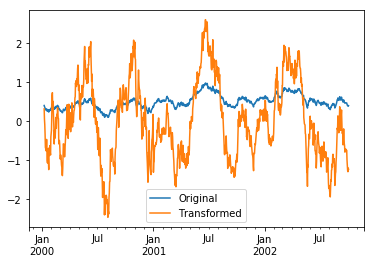

In [72]:
compare.plot()
plt.show()

In [73]:
data_range=lambda x: x.max()-x.min()
ts.groupby(key).transform(data_range)

2000-01-08    0.493419
2000-01-09    0.493419
2000-01-10    0.493419
2000-01-11    0.493419
2000-01-12    0.493419
2000-01-13    0.493419
2000-01-14    0.493419
2000-01-15    0.493419
2000-01-16    0.493419
2000-01-17    0.493419
2000-01-18    0.493419
2000-01-19    0.493419
2000-01-20    0.493419
2000-01-21    0.493419
2000-01-22    0.493419
2000-01-23    0.493419
2000-01-24    0.493419
2000-01-25    0.493419
2000-01-26    0.493419
2000-01-27    0.493419
2000-01-28    0.493419
2000-01-29    0.493419
2000-01-30    0.493419
2000-01-31    0.493419
2000-02-01    0.493419
2000-02-02    0.493419
2000-02-03    0.493419
2000-02-04    0.493419
2000-02-05    0.493419
2000-02-06    0.493419
                ...   
2002-09-05    0.559332
2002-09-06    0.559332
2002-09-07    0.559332
2002-09-08    0.559332
2002-09-09    0.559332
2002-09-10    0.559332
2002-09-11    0.559332
2002-09-12    0.559332
2002-09-13    0.559332
2002-09-14    0.559332
2002-09-15    0.559332
2002-09-16    0.559332
2002-09-17 

In [74]:
ts.groupby(key).transform('max') - ts.groupby(key).transform('min')

2000-01-08    0.493419
2000-01-09    0.493419
2000-01-10    0.493419
2000-01-11    0.493419
2000-01-12    0.493419
2000-01-13    0.493419
2000-01-14    0.493419
2000-01-15    0.493419
2000-01-16    0.493419
2000-01-17    0.493419
2000-01-18    0.493419
2000-01-19    0.493419
2000-01-20    0.493419
2000-01-21    0.493419
2000-01-22    0.493419
2000-01-23    0.493419
2000-01-24    0.493419
2000-01-25    0.493419
2000-01-26    0.493419
2000-01-27    0.493419
2000-01-28    0.493419
2000-01-29    0.493419
2000-01-30    0.493419
2000-01-31    0.493419
2000-02-01    0.493419
2000-02-02    0.493419
2000-02-03    0.493419
2000-02-04    0.493419
2000-02-05    0.493419
2000-02-06    0.493419
                ...   
2002-09-05    0.559332
2002-09-06    0.559332
2002-09-07    0.559332
2002-09-08    0.559332
2002-09-09    0.559332
2002-09-10    0.559332
2002-09-11    0.559332
2002-09-12    0.559332
2002-09-13    0.559332
2002-09-14    0.559332
2002-09-15    0.559332
2002-09-16    0.559332
2002-09-17 

In [75]:
df_re = pd.DataFrame({'A': [1] * 10 + [5] * 10,
                        'B': np.arange(20)})

In [76]:
df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [77]:
df_re.groupby('A').rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [78]:
df_re.groupby('A').expanding().sum()

A      B
A                
1 0    1.0    0.0
  1    2.0    1.0
  2    3.0    3.0
  3    4.0    6.0
  4    5.0   10.0
  5    6.0   15.0
  6    7.0   21.0
  7    8.0   28.0
  8    9.0   36.0
  9   10.0   45.0
5 10   5.0   10.0
  11  10.0   21.0
  12  15.0   33.0
  13  20.0   46.0
  14  25.0   60.0
  15  30.0   75.0
  16  35.0   91.0
  17  40.0  108.0
  18  45.0  126.0
  19  50.0  145.0

In [79]:
df_re = pd.DataFrame({'date': pd.date_range(start='2016-01-01',periods=4,freq='W'),
                      'group': [1, 1, 2, 2],

                      'val': [5, 6, 7, 8]}).set_index('date')

In [80]:
df_re

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [81]:
df_re.groupby('group').resample('1D').ffill()

group  val
group date                  
1     2016-01-03      1    5
      2016-01-04      1    5
      2016-01-05      1    5
      2016-01-06      1    5
      2016-01-07      1    5
      2016-01-08      1    5
      2016-01-09      1    5
      2016-01-10      1    6
2     2016-01-17      2    7
      2016-01-18      2    7
      2016-01-19      2    7
      2016-01-20      2    7
      2016-01-21      2    7
      2016-01-22      2    7
      2016-01-23      2    7
      2016-01-24      2    8

In [82]:
#Filtration
sf = pd.Series([1, 1, 2, 3, 3, 3])
sf.groupby(sf).filter(lambda x: x.sum()>2)

3    3
4    3
5    3
dtype: int64

In [83]:
#Define another dataframe
dff = pd.DataFrame({'A': np.arange(8), 'B': list('aabbbbcc')})

In [84]:
dff

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,b
5,5,b
6,6,c
7,7,c


In [85]:
dff.groupby('B').filter(lambda x: len(x) > 2)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [86]:
dff.groupby('B').filter(lambda x: len(x) > 2, dropna=False)

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


In [87]:
dff['C']=np.arange(8)

In [88]:
dff.groupby('B').filter(lambda x: len(x['C']) > 2)

,A,B,C
2,2,b,2
3,3,b,3
4,4,b,4
5,5,b,5


In [89]:
dff.groupby('B').head(2)

,A,B,C
0,0,a,0
1,1,a,1
2,2,b,2
3,3,b,3
6,6,c,6
7,7,c,7


In [90]:
#Dispatching to instance methods
grouped=df.groupby('A')
grouped.agg(lambda x:x.std())

,C,D
A,,
bar,0.252259,0.306600
foo,0.663188,0.786032


In [91]:
grouped.std()

,C,D
A,,
bar,0.252259,0.306600
foo,0.663188,0.786032


In [92]:
#Create Another Data Frame
tsdf=pd.DataFrame(np.random.randn(1000,3),index=pd.date_range('1/1/2000', periods=1000),columns=['A','B','C'])

In [93]:
tsdf.iloc[::2] = np.nan

In [94]:
grouped = tsdf.groupby(lambda x: x.year)

In [95]:
grouped.fillna(method='pad')

,A,B,C
2000-01-01,NaN,NaN,NaN
2000-01-02,-0.184516,0.730033,0.405681
2000-01-03,-0.184516,0.730033,0.405681
2000-01-04,0.580342,-0.315865,0.326186
2000-01-05,0.580342,-0.315865,0.326186
2000-01-06,-0.853307,-0.066637,-0.543853
2000-01-07,-0.853307,-0.066637,-0.543853
2000-01-08,-0.928595,-0.464793,-1.166057
2000-01-09,-0.928595,-0.464793,-1.166057
2000-01-10,0.852839,0.616875,-1.627409


In [96]:
s = pd.Series([9, 8, 7, 5, 19, 1, 4.2, 3.3])

In [97]:
g = pd.Series(list('abababab'))

In [98]:
gb = s.groupby(g)

In [99]:
gb.nlargest(3)

a  4    19.0
   0     9.0
   2     7.0
b  1     8.0
   3     5.0
   7     3.3
dtype: float64

In [100]:
gb.nsmallest(3)

a  6    4.2
   2    7.0
   0    9.0
b  5    1.0
   7    3.3
   3    5.0
dtype: float64

In [101]:
#Flexible apply
df

,A,B,C,D
0,foo,one,-0.274572,0.136989
1,bar,one,-0.446528,-0.820500
2,foo,two,1.259160,1.980955
3,bar,three,0.043132,-0.218359
4,foo,two,1.135251,0.230160
5,bar,two,-0.306957,-0.419028
6,foo,one,0.109309,1.309256
7,foo,three,0.333866,0.551402


In [102]:
grouped = df.groupby('A')

In [103]:
grouped['C'].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean    -0.236784
     std      0.252259
     min     -0.446528
     25%     -0.376743
     50%     -0.306957
     75%     -0.131913
     max      0.043132
foo  count    5.000000
     mean     0.512603
     std      0.663188
     min     -0.274572
     25%      0.109309
     50%      0.333866
     75%      1.135251
     max      1.259160
Name: C, dtype: float64

In [104]:
grouped=df.groupby('A')['C']

In [105]:
def f(group):
    return pd.DataFrame({'original': group,
                        'demeaned' : group - group.mean()})

In [106]:
grouped.apply(f)

,demeaned,original
0,-0.787175,-0.274572
1,-0.209744,-0.446528
2,0.746557,1.259160
3,0.279916,0.043132
4,0.622648,1.135251
5,-0.070173,-0.306957
6,-0.403294,0.109309
7,-0.178737,0.333866


In [107]:
def f(x):
    return pd.Series([ x, x**2 ], index = ['x', 'x^2'])

In [108]:
s.apply(f)

,x,x^2
0,9.0,81.00
1,8.0,64.00
2,7.0,49.00
3,5.0,25.00
4,19.0,361.00
5,1.0,1.00
6,4.2,17.64
7,3.3,10.89


In [109]:
#Create Another DataFrame
d = pd.DataFrame({"a":["x", "y"], "b":[1,2]})

In [110]:
def identity(df):
    print(df)
    return df

In [111]:
d.groupby("a").apply(identity)

   a  b
0  x  1
   a  b
0  x  1
   a  b
1  y  2


,a,b
0,x,1
1,y,2


In [112]:
#Other useful features
#Define a data frame as below
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo','bar','foo', 'bar', 'foo','foo'],
                          
                   'B' : ['one', 'one', 'two','three','two', 'two', 'one','three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [113]:
df

,A,B,C,D
0,foo,one,1.055586,1.274686
1,bar,one,0.121240,-1.175839
2,foo,two,-1.010387,-1.596219
3,bar,three,0.430959,-0.147998
4,foo,two,0.444233,-0.077614
5,bar,two,-0.105627,0.355850
6,foo,one,1.736767,-0.328303
7,foo,three,-0.041931,0.733403


In [114]:
df.groupby('A').std()

,C,D
A,,
bar,0.269357,0.780640
foo,1.048380,1.098228


In [115]:
#Grouping with ordered factors
data = pd.Series(np.random.randn(100))

In [116]:
factor = pd.qcut(data, [0, .25, .5, .75, 1.])
factor

0                   (-0.534, 0.224]
1                   (-0.534, 0.224]
2                   (-0.534, 0.224]
3                   (-0.534, 0.224]
4                    (0.921, 2.929]
5                    (0.224, 0.921]
6                    (0.921, 2.929]
7                    (0.921, 2.929]
8                    (0.921, 2.929]
9                    (0.224, 0.921]
10                  (-0.534, 0.224]
11                  (-0.534, 0.224]
12                  (-0.534, 0.224]
13    (-2.9699999999999998, -0.534]
14                   (0.921, 2.929]
15                   (0.921, 2.929]
16                   (0.921, 2.929]
17                   (0.224, 0.921]
18                   (0.921, 2.929]
19                   (0.921, 2.929]
20                   (0.224, 0.921]
21    (-2.9699999999999998, -0.534]
22    (-2.9699999999999998, -0.534]
23                   (0.921, 2.929]
24    (-2.9699999999999998, -0.534]
25                   (0.224, 0.921]
26                   (0.224, 0.921]
27                  (-0.534,

In [117]:
data.groupby(factor).mean()

(-2.9699999999999998, -0.534]   -1.308123
(-0.534, 0.224]                 -0.178456
(0.224, 0.921]                   0.532815
(0.921, 2.929]                   1.554831
dtype: float64

In [118]:
#Grouping with a Grouper specification
import datetime
df = pd.DataFrame({'Branch' : 'A A A A A A A B'.split(),
                    'Buyer': 'Carl Mark Carl Carl Joe Joe Joe Carl'.split(),
                    'Quantity': [1,3,5,1,8,1,9,3],
                   'Date' : [
                            datetime.datetime(2013,1,1,13,0),
                            datetime.datetime(2013,1,1,13,5),
                            datetime.datetime(2013,10,1,20,0),
                            datetime.datetime(2013,10,2,10,0),
                            datetime.datetime(2013,10,1,20,0),
                            datetime.datetime(2013,10,2,10,0),
                            datetime.datetime(2013,12,2,12,0),
                            datetime.datetime(2013,12,2,14,0),
                            ]
                    })

In [119]:
df

,Branch,Buyer,Date,Quantity
0,A,Carl,2013-01-01 13:00:00,1
1,A,Mark,2013-01-01 13:05:00,3
2,A,Carl,2013-10-01 20:00:00,5
3,A,Carl,2013-10-02 10:00:00,1
4,A,Joe,2013-10-01 20:00:00,8
5,A,Joe,2013-10-02 10:00:00,1
6,A,Joe,2013-12-02 12:00:00,9
7,B,Carl,2013-12-02 14:00:00,3


In [120]:
df.groupby([pd.Grouper(freq='1M',key='Date'),'Buyer']).sum()

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2013-10-31 Carl          6
           Joe           9
2013-12-31 Carl          3
           Joe           9

In [121]:
df = df.set_index('Date')

In [122]:
df

,Branch,Buyer,Quantity
Date,,,
2013-01-01 13:00:00,A,Carl,1
2013-01-01 13:05:00,A,Mark,3
2013-10-01 20:00:00,A,Carl,5
2013-10-02 10:00:00,A,Carl,1
2013-10-01 20:00:00,A,Joe,8
2013-10-02 10:00:00,A,Joe,1
2013-12-02 12:00:00,A,Joe,9
2013-12-02 14:00:00,B,Carl,3


In [123]:
df['Date'] = df.index + pd.offsets.MonthEnd(2)

In [124]:
df['Date']

Date
2013-01-01 13:00:00   2013-02-28 13:00:00
2013-01-01 13:05:00   2013-02-28 13:05:00
2013-10-01 20:00:00   2013-11-30 20:00:00
2013-10-02 10:00:00   2013-11-30 10:00:00
2013-10-01 20:00:00   2013-11-30 20:00:00
2013-10-02 10:00:00   2013-11-30 10:00:00
2013-12-02 12:00:00   2014-01-31 12:00:00
2013-12-02 14:00:00   2014-01-31 14:00:00
Name: Date, dtype: datetime64[ns]

In [125]:
df.groupby([pd.Grouper(freq='6M',key='Date'),'Buyer']).sum()

Quantity
Date       Buyer          
2013-02-28 Carl          1
           Mark          3
2014-02-28 Carl          9
           Joe          18

In [126]:
df = pd.DataFrame([[1, 2], [1, 4], [5, 6]], columns=['A', 'B'])

In [127]:
df

,A,B
0,1,2
1,1,4
2,5,6


In [128]:
g = df.groupby('A')
g.head()

,A,B
0,1,2
1,1,4
2,5,6


In [129]:
g.tail()

,A,B
0,1,2
1,1,4
2,5,6


In [130]:
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=['A', 'B'])

In [131]:
g = df.groupby('A')

In [132]:
g.nth(0)

,B
A,
1,NaN
5,6.0


In [133]:
g.nth(-1)

,B
A,
1,4.0
5,6.0


In [134]:
g.nth(1)

,B
A,
1,4.0


In [135]:
g.nth(0, dropna='any')

,B
A,
1,4.0
5,6.0


In [136]:
g.first()

,B
A,
1,4.0
5,6.0


In [137]:
g.nth(-1, dropna='any')

,B
A,
1,4.0
5,6.0


In [138]:
g.last()

,B
A,
1,4.0
5,6.0


In [139]:
g.B.nth(0, dropna='all')

A
1    4.0
5    6.0
Name: B, dtype: float64

In [140]:
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=['A', 'B'])
df

,A,B
0,1,NaN
1,1,4.0
2,5,6.0


In [142]:
g = df.groupby('A',as_index=False)

In [143]:
g.nth(0)

,A,B
0,1,NaN
2,5,6.0


In [144]:
g.nth(-1)

,A,B
1,1,4.0
2,5,6.0


In [145]:
# get the first, 4th, and last date index for each month
#df.groupby((df.index.year, df.index.month)).nth([0, 3, -1])

In [146]:
dfg = pd.DataFrame(list('aaabba'), columns=['A'])
dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [147]:
dfg.groupby('A').cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [148]:
dfg.groupby('A').cumcount(ascending=False)

0    3
1    2
2    1
3    1
4    0
5    0
dtype: int64

In [149]:
dfg = pd.DataFrame(list('aaabba'), columns=['A'])

In [150]:
dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [151]:
dfg.groupby('A').ngroup()

0    0
1    0
2    0
3    1
4    1
5    0
dtype: int64

In [152]:
dfg.groupby('A').ngroup(ascending=False)

0    1
1    1
2    1
3    0
4    0
5    1
dtype: int64

In [153]:
np.random.seed(1234)

In [154]:
df = pd.DataFrame(np.random.randn(50, 2))

In [156]:
df['g'] = np.random.choice(['A', 'B'], size=50)
df['g']

0     B
1     B
2     B
3     A
4     A
5     B
6     A
7     A
8     B
9     B
10    B
11    B
12    B
13    A
14    B
15    B
16    A
17    A
18    B
19    A
20    A
21    B
22    B
23    A
24    B
25    B
26    A
27    B
28    B
29    A
30    A
31    B
32    B
33    A
34    B
35    B
36    A
37    B
38    B
39    B
40    A
41    A
42    A
43    B
44    B
45    B
46    A
47    B
48    B
49    A
Name: g, dtype: object

In [157]:
df.loc[df['g'] == 'B', 1] += 3

A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

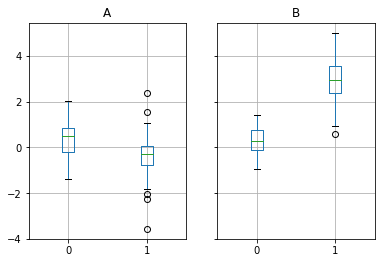

In [158]:
df.groupby('g').boxplot()

In [159]:
import numpy as np

In [167]:
n=50
df = pd.DataFrame({'Store': np.random.choice(['Store_1', 'Store_2'],n),
                    'Product': np.random.choice(['Product_1', 'Product_2']),
                    'Revenue':(np.random.random(n)*50+10).round(2),
                    'Quantity': np.random.randint(1, 10, size=n)})

In [168]:
df.head(2)

,Product,Quantity,Revenue,Store
0,Product_2,4,40.22,Store_2
1,Product_2,1,15.16,Store_2


In [169]:
(df.groupby(['Store', 'Product']).pipe(lambda grp: grp.Revenue.sum()/grp.Quantity.sum()).unstack().round(2))

Product,Product_2
Store,
Store_1,8.69
Store_2,6.83


In [170]:
df = pd.DataFrame({'a':[1,0,0], 'b':[0,1,0], 'c':[1,0,0], 'd':[2,3,4]})

In [171]:
df.groupby(df.sum(), axis=1).sum()

,1,9
0,2,2
1,1,3
2,0,4


In [172]:
dfg = pd.DataFrame({"A": [1, 1, 2, 3, 2], "B": list("aaaba")})
dfg

,A,B
0,1,a
1,1,a
2,2,a
3,3,b
4,2,a


In [173]:
dfg.groupby(["A", "B"]).ngroup()

0    0
1    0
2    1
3    2
4    1
dtype: int64

In [174]:
dfg.groupby(["A", [0, 0, 0, 1, 1]]).ngroup()

0    0
1    0
2    1
3    3
4    2
dtype: int64

In [177]:
df = pd.DataFrame(np.random.randn(10,2))
df

,0,1
0,0.229587,1.098357
1,-1.728525,-0.880774
2,-0.641341,2.391179
3,-1.212239,-1.481208
4,-1.543384,1.557902
5,1.089202,-3.141974
6,-0.694408,-0.446460
7,-0.581518,-1.547921
8,1.124596,-1.416937
9,-0.247278,-1.363210


In [178]:
df.index // 5

Int64Index([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype='int64')

In [179]:
df.groupby(df.index // 5).std()

,0,1
0,0.792056,1.649135
1,0.899612,0.974582


In [180]:
df=pd.DataFrame({'a':[1,1,1,2,3,2,1,1,2,3,1,2],
                 'b':[1,1,1,1,2,2,2,3,3,4,4,1],
                 'c':[1,1,1,1,1,1,2,2,2,3,3,3],
                 'd':[1,1,1,1,1,2,3,4,4,4,4,2]    
                })

In [181]:
def compute_metrics(x):
        result = {'b_sum': x['b'].sum(), 'c_mean': x['c'].mean()}
        return pd.Series(result, name='metrics')

In [184]:
result = df.groupby('a').apply(compute_metrics)
result

metrics,b_sum,c_mean
a,,
1,12.0,1.666667
2,7.0,1.750000
3,6.0,2.000000


In [183]:
result.stack()

a  metrics
1  b_sum      12.000000
   c_mean      1.666667
2  b_sum       7.000000
   c_mean      1.750000
3  b_sum       6.000000
   c_mean      2.000000
dtype: float64